In [45]:
import scanpy as sc

# Define path to your 10X files (adjust the path accordingly)
IPSC_path = "IPSC_der_filtered_feature_bc_matrix/" 
fetal_path = "Fetal_filtered_feature_bc_matrix/"

# Read in the 10X data
adata = sc.read_10x_mtx(
    IPSC_path, 
    var_names='gene_ids',  # Use gene symbols instead of Ensembl IDs ##Genes in this data set are ids and not symbols. 
    cache=True  # Cache for faster access
)

# Check the loaded data
print(adata)


IndexError: list index out of range

In [1]:
import pandas as pd
import scipy.io

# Define file paths
matrix_path = "IPSC_der_filtered_feature_bc_matrix/matrix.mtx"
genes_path = "IPSC_der_filtered_feature_bc_matrix/genes.tsv"
barcodes_path = "IPSC_der_filtered_feature_bc_matrix/barcodes.tsv"

# Check the first few lines of genes.tsv
genes_df = pd.read_csv(genes_path, header=None, sep="\t")
print("First few lines of genes.tsv:")
print(genes_df.head())

# Check the first few lines of barcodes.tsv
barcodes_df = pd.read_csv(barcodes_path, header=None, sep="\t")
print("\nFirst few lines of barcodes.tsv:")
print(barcodes_df.head())

# Check matrix.mtx dimensions
matrix = scipy.io.mmread(matrix_path)
print("\nMatrix shape (should be cells x genes):", matrix.shape)



First few lines of genes.tsv:
             0            1
0  MIR1302-2HG  MIR1302-2HG
1      FAM138A      FAM138A
2        OR4F5        OR4F5
3   AL627309.1   AL627309.1
4   AL627309.3   AL627309.3

First few lines of barcodes.tsv:
                    0
0  AAACCCAAGCTCTTCC-1
1  AAACCCACAATCTCTT-1
2  AAACCCACATCCTTGC-1
3  AAACCCAGTCTGGTTA-1
4  AAACCCATCATAAGGA-1


ValueError: Line 2727212: Invalid integer value.

In [12]:
import scipy.io

# Load the matrix
matrix = scipy.io.mmread("IPSC_der_filtered_feature_bc_matrix/matrix.mtx")

# Convert to dense (optional, only for small matrices)
dense_matrix = matrix.toarray()

# Print the shape (should be genes x cells)
print("Matrix shape:", dense_matrix.shape)

# Check some counts
print("First few rows:\n", dense_matrix[:5, :5])


ValueError: not enough values to unpack (expected 5, got 3)

In [34]:
with open("IPSC_der_filtered_feature_bc_matrix/matrix.mtx", "r") as f:
    for i in range(10):  # Print first 10 lines
        print(f.readline().strip())


27659 2206 2
27665 2206 2
27671 2206 1
27673 2206 2
27674 2206 1
27676 2206 8
27683 2206 2
27688 2206 2
27690 2206 1
27692 2206 3


In [37]:
import scipy.io

matrix = scipy.io.mmread("IPSC_der_filtered_feature_bc_matrix/matrix.mtx")
print("Matrix shape:", matrix.shape)




ValueError: 'entries' in header is larger than number of entries

In [43]:
from io import StringIO
from scipy.io import mmread
from scipy.io import mminfo
mtxFile = "IPSC_der_filtered_feature_bc_matrix/matrix.mtx"
mminfo(mtxFile)

(36601, 8622, 45676789, 'coordinate', 'integer', 'general')

In [7]:
import scanpy as sc
#adata = sc.read_10x_mtx("IPSC_der_filtered_feature_bc_matrix/", var_names="gene_ids", cache=True)
#print(adata)

with open("IPSC_der_filtered_feature_bc_matrix/matrix.mtx", "r") as f:
    for i in range(5):
        print(f.readline().strip())



%%MatrixMarket matrix coordinate integer general
36601 8622 45676789
25 1 1
30 1 1
31 1 1


In [9]:
# Check matrix.mtx dimensions
path_to_mtx = "IPSC_der_filtered_feature_bc_matrix/matrix.mtx"
#matrix = scipy.io.mmread(path_to_mtx)
#print("\nMatrix shape (should be cells x genes):", matrix.shape)

#import scipy.io

#path_to_mtx = "IPSC_der_filtered_feature_bc_matrix/matrix.mtx"

#try:
#    matrix = scipy.io.mmread(path_to_mtx)
#    print("\nMatrix shape (should be cells x genes):", matrix.shape)
#except Exception as e:
#    print("Error loading matrix:", str(e))


import scipy.io
import pandas as pd

# Read and rewrite the matrix
try:
    matrix = scipy.io.mmread("IPSC_der_filtered_feature_bc_matrix/matrix.mtx")
    scipy.io.mmwrite("IPSC_der_filtered_feature_bc_matrix/fixed_matrix.mtx", matrix)
    print("Successfully rewritten the matrix.")
except Exception as e:
    print("Error processing matrix:", str(e))



Successfully rewritten the matrix.


In [34]:
import scanpy as sc
import scipy.io

# Load the matrix
path_to_mtx = "IPSC_der_filtered_feature_bc_matrix/fixed_matrix.mtx"
matrix = scipy.io.mmread(path_to_mtx)

# Load the genes and barcodes
genes_path = "IPSC_der_filtered_feature_bc_matrix/genes.tsv"
barcodes_path = "IPSC_der_filtered_feature_bc_matrix/barcodes.tsv"

# Read the gene names and barcodes
genes = pd.read_csv(genes_path, header=None, sep="\t")[1].values  # Gene symbols
barcodes = pd.read_csv(barcodes_path, header=None, sep="\t")[0].values  # Cell barcodes

# Create AnnData object
adata = sc.AnnData(X=matrix.T)  # Transpose so cells are rows, genes are columns
adata.obs['cell_id'] = barcodes
adata.var['gene_id'] = genes

# Convert the sparse matrix to CSR format
adata.X = adata.X.tocsr()

# Save the AnnData object to a file
adata.write('ipsc_adata_file.h5ad')

# Check the object
print(adata)


AnnData object with n_obs × n_vars = 8622 × 36601
    obs: 'cell_id'
    var: 'gene_id'


In [33]:
# Load the matrix
fetal_path_to_mtx = "Fetal_filtered_feature_bc_matrix/matrix.mtx"
fetal_matrix = scipy.io.mmread(fetal_path_to_mtx)

# Load the genes and barcodes
fetal_genes_path = "Fetal_filtered_feature_bc_matrix/genes.tsv"
fetal_barcodes_path = "Fetal_filtered_feature_bc_matrix/barcodes.tsv"

# Read the gene names and barcodes
fetal_genes = pd.read_csv(fetal_genes_path, header=None, sep="\t")[1].values  # Gene symbols
fetal_barcodes = pd.read_csv(fetal_barcodes_path, header=None, sep="\t")[0].values  # Cell barcodes

# Create AnnData object
fetal_adata = sc.AnnData(X=fetal_matrix.T)  # Transpose so cells are rows, genes are columns
fetal_adata.obs['cell_id'] = fetal_barcodes
fetal_adata.var['gene_id'] = fetal_genes

# Convert the sparse matrix to CSR format
fetal_adata.X = fetal_adata.X.tocsr()

# Save the AnnData object to a file
fetal_adata.write('fetal_adata_file.h5ad')


# Check the object
print(fetal_adata)




AnnData object with n_obs × n_vars = 8785 × 35780
    obs: 'cell_id'
    var: 'gene_id'


In [54]:
# Check matrix.mtx dimensions
path_to_mtx = "Fetal_filtered_feature_bc_matrix/matrix.mtx"
#matrix = scipy.io.mmread(path_to_mtx)
#print("\nMatrix shape (should be cells x genes):", matrix.shape)

import scipy.io

#path_to_mtx = "IPSC_der_filtered_feature_bc_matrix/matrix.mtx"

try:
    matrix = scipy.io.mmread(path_to_mtx)
    print("\nMatrix shape (should be cells x genes):", matrix.shape)
except Exception as e:
    print("Error loading matrix:", str(e))


Error loading matrix: list index out of range


In [55]:
with open(path_to_mtx, 'r') as f:
    lines = f.readlines()
    print("First few lines of the matrix.mtx file:", lines[:10])  # Print first 10 lines


First few lines of the matrix.mtx file: ['%%MatrixMarket matrix coordinate integer general\n', '35780 8785 52002435\n', '44 1 1\n', '53 1 1\n', '54 1 1\n', '58 1 1\n', '72 1 1\n', '74 1 2\n', '88 1 1\n', '89 1 1\n']


In [56]:
import scipy.io

path_to_mtx = "Fetal_filtered_feature_bc_matrix/matrix.mtx"

try:
    matrix = scipy.io.mmread(path_to_mtx)
    print("\nMatrix shape (should be cells x genes):", matrix.shape)
except Exception as e:
    print("Error loading matrix:", str(e))


Error loading matrix: not enough values to unpack (expected 2, got 1)


In [57]:
with open(path_to_mtx, 'r') as f:
    lines = f.readlines()

# Skip the header and check the matrix data
data_lines = lines[2:]

# Check for lines with unexpected format
for i, line in enumerate(data_lines):
    try:
        parts = line.split()
        # This checks if each line has 3 parts (gene index, cell index, and value)
        if len(parts) != 3:
            print(f"Malformed line {i}: {line}")
    except Exception as e:
        print(f"Error processing line {i}: {line} - {e}")


Malformed line 43111671: 5802 7


In [58]:
# Filter out lines that don't have exactly 3 values
data_lines = [line for line in data_lines if len(line.split()) == 3]

# Write the cleaned data back to a new file or proceed with reading it
with open('cleaned_matrix.mtx', 'w') as f:
    f.writelines(data_lines)

# Proceed with reading the cleaned matrix
try:
    matrix = scipy.io.mmread('cleaned_matrix.mtx')
    print("\nMatrix shape (should be cells x genes):", matrix.shape)
except Exception as e:
    print("Error loading matrix:", str(e))


Error loading matrix: not enough values to unpack (expected 5, got 3)


In [59]:
import scipy.io

path_to_mtx = "Fetal_filtered_feature_bc_matrix/matrix.mtx"

try:
    # Try reading the matrix again
    matrix = scipy.io.mmread(path_to_mtx)
    print("\nMatrix shape (should be cells x genes):", matrix.shape)
except Exception as e:
    print("Error loading matrix:", str(e))



Matrix shape (should be cells x genes): (35780, 8785)


In [5]:
import scanpy as sc
import scipy.io

# Path to your files
path_to_mtx = "Fetal_filtered_feature_bc_matrix/matrix.mtx"
genes_path = "Fetal_filtered_feature_bc_matrix/genes.tsv"
barcodes_path = "Fetal_filtered_feature_bc_matrix/barcodes.tsv"

# Load the matrix using scipy
matrix = scipy.io.mmread(path_to_mtx)

# Load genes (features) and barcodes (cells)
genes = []
with open(genes_path, 'r') as f:
    for line in f:
        genes.append(line.strip())  # Strip newline characters

barcodes = []
with open(barcodes_path, 'r') as f:
    for line in f:
        barcodes.append(line.strip())  # Strip newline characters

# Create the AnnData object
fetal_adata = sc.AnnData(X=matrix.T,  # Transpose the matrix (cells x genes)
                   obs={'cell_ids': barcodes},  # Cell identifiers (barcodes)
                   var={'gene_ids': genes})  # Gene identifiers

# Check the resulting AnnData object
print(fetal_adata)


ModuleNotFoundError: No module named 'scanpy'

In [69]:
!pip install scvi-tools

     |████████████████████████████████| 746 kB 8.1 MB/s eta 0:00:01


In [67]:

adata
fetal_adata


AnnData object with n_obs × n_vars = 8785 × 35780
    obs: 'cell_ids'
    var: 'gene_ids'

In [85]:
import scvi

print(scvi.__version__)


TypeError: 'type' object is not subscriptable

In [86]:
!pip uninstall scvi-tools -y
!pip install --no-cache-dir scvi-tools




Found existing installation: scvi-tools 0.20.3
Uninstalling scvi-tools-0.20.3:
  Successfully uninstalled scvi-tools-0.20.3
     |████████████████████████████████| 330 kB 6.6 MB/s eta 0:00:01


In [90]:
!sudo apt update
!sudo apt install python3.9 python3.9-venv python3.9-dev -y


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease    
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease  
Hit:4 http://packages.cloud.google.com/apt gcsfuse-focal InRelease             
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease           
Ign:6 https://basemount-prod.s3.amazonaws.com ubuntu InRelease      
Ign:7 https://basemount-prod.s3.amazonaws.com ubuntu Release
Hit:8 https://packages.cloud.google.com/apt google-cloud-ops-agent-focal-2 InRelease
Ign:9 https://basemount-prod.s3.amazonaws.com ubuntu/main all Packages
Ign:10 https://basemount-prod.s3.amazonaws.com ubuntu/main amd64 Packages
Ign:9 https://basemount-prod.s3.amazonaws.com ubuntu/main all Packages
Ign:10 https://basemount-prod.s3.amazonaws.com ubuntu/main amd64 Packages
Ign:9 https://basemount-prod.s3.amazonaws.com ubuntu/main all Packages
Ign:10 https://basemount-prod.s3.amazona

In [78]:
!pip install --upgrade pycairo testresources packaging jax jaxlib


  Using cached pycairo-1.26.1.tar.gz (346 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached testresources-2.0.1-py2.py3-none-any.whl (36 kB)
Requirement already up-to-date: packaging in ./.local/lib/python3.8/site-packages (24.2)
Requirement already up-to-date: jax in ./.local/lib/python3.8/site-packages (0.4.13)
Requirement already up-to-date: jaxlib in ./.local/lib/python3.8/site-packages (0.4.13)
  Using cached pbr-6.1.1-py2.py3-none-any.whl (108 kB)
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 /tmp/tmpbfafo4e7 build_wheel /tmp/tmp8rjrux5l
       cwd: /tmp/pip-install-fzpyghgp/pycairo
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build/lib.linux-x86_64-cpython-38/cairo
  copying cairo/__init__.py -> build/lib.linux-x86_64-cpython-38/cairo
  copying cairo/__init__.pyi -> build/lib.linux-x86_64-cpython-38/cai

In [99]:
!sudo apt update
!sudo apt install python3.10 python3.10-venv python3.10-dev



Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease    
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease  
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease               
Ign:5 https://basemount-prod.s3.amazonaws.com ubuntu InRelease             
Hit:6 http://packages.cloud.google.com/apt gcsfuse-focal InRelease  
Ign:7 https://basemount-prod.s3.amazonaws.com ubuntu Release
Hit:8 https://packages.cloud.google.com/apt google-cloud-ops-agent-focal-2 InRelease
Ign:9 https://basemount-prod.s3.amazonaws.com ubuntu/main all Packages
Ign:10 https://basemount-prod.s3.amazonaws.com ubuntu/main amd64 Packages
Ign:9 https://basemount-prod.s3.amazonaws.com ubuntu/main all Packages
Ign:10 https://basemount-prod.s3.amazonaws.com ubuntu/main amd64 Packages
Ign:9 https://basemount-prod.s3.amazonaws.com ubuntu/main all Packages
Ign:10 https://basemount-prod.s3.amazona

In [100]:
#!python3.9 -m venv scvi-env
#!source scvi-env/bin/activate
#!pip install --upgrade pip
!pip install scvi-tools


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import scvi

print(scvi.__version__)


1.1.6.post2


In [3]:
!which python
!python -c "import sys; print(sys.executable)"
!python -m pip list | grep scvi-tools


/home/cwebster/cwebster@alignment/envs/scvi-env/bin/python
/home/cwebster/cwebster@alignment/envs/scvi-env/bin/python
scvi-tools                1.1.6.post2


In [15]:
import scvi
import scanpy as sc

# Ensure the matrix is in CSR format
adata.X = adata.X.tocsr()  # Convert COO -> CSR

# Now apply the gene filtering
sc.pp.filter_genes(adata, min_cells=10)


In [35]:
adata = sc.read('ipsc_adata_file.h5ad')

In [32]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [18]:
!pip install --user scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.7 MB/s eta 0:00:00


In [20]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

ImportError: Please install skmisc package via `pip install --user scikit-misc

In [1]:
#import sys
#!{sys.executable} -m pip show scikit-misc

#import sys
#print(sys.executable)

import sys
!{sys.executable} -m pip show scikit-misc

import skmisc
print(skmisc.__version__)





Name: scikit-misc
Version: 0.3.1
Summary: Miscellaneous tools for scientific computing.
Home-page: https://has2k1.github.io/scikit-misc/stable
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: Copyright (c) 2016, Hassan Kibirige
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
         * Redistributions of source code must retain the above copyright notice,
           this list of conditions and the following disclaimer.
         * Redistributions in binary form must reproduce the above copyright
           notice, this list of conditions and the following disclaimer in the
           documentation and/or other materials provided with the distribution.
         * Neither the name of  nor the names of its contributors may be used to
           endorse or promote products derived from this software without specific
 

In [28]:
!pip install scikit-misc


<font size="5">Training model to search for doublets to get rid of doublet (two cells in the chamber) abberration. 

In [2]:
import sys
print(sys.executable)

import skmisc
print(skmisc.__version__)



/home/cwebster/cwebster@alignment/envs/scvi-env/bin/python
0.3.1


In [7]:
import skmisc
import scanpy as sc
import scvi

#regenerate the adata file if necessary
adata = sc.read_h5ad("ipsc_adata_file.h5ad")

# Ensure the matrix is in CSR format
adata.X = adata.X.tocsr()  # Convert COO -> CSR

# Now apply the gene filtering
sc.pp.filter_genes(adata, min_cells=10)


sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [8]:
adata

AnnData object with n_obs × n_vars = 8622 × 2000
    obs: 'cell_id'
    var: 'gene_id', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [36]:
import scvi
import torch

import scvi

# Assuming you already have the AnnData object `adata`
# Step 1: Setup AnnData
scvi.model.SCVI.setup_anndata(adata)

# Step 2: Create the SCVI model
model = scvi.model.SCVI(adata)

# Step 3: Train the model with the number of epochs specified
model.train(max_epochs=400)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|█| 400/400 [2:33:24<00:00, 22.90s/it, v_num=1, train_loss_step=1.41e+4, train_loss_epoch=1.3

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [2:33:24<00:00, 23.01s/it, v_num=1, train_loss_step=1.41e+4, train_loss_epoch=1.3


In [37]:
solo = scvi.external.SOLO.from_scvi_model(model)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader

Epoch 365/400:  91%|█▊| 365/400 [04:33<00:26,  1.33it/s, v_num=1, train_loss_step=0.401, train_loss_epoch=0.312]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.308. Signaling Trainer to stop.


In [38]:
df = solo.predict()

df['prediction'] = solo.predict(soft = False)
df

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
0,0.443934,0.556066,singlet
1,0.225110,0.774889,singlet
2,0.157155,0.842845,singlet
3,0.322898,0.677103,singlet
4,0.088582,0.911418,singlet
...,...,...,...
8617,0.097755,0.902245,singlet
8618,0.933573,0.066427,doublet
8619,0.353347,0.646653,singlet
8620,0.386389,0.613612,singlet


In [39]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1375,1375
singlet,7247,7247


NameError: name 'xlim' is not defined

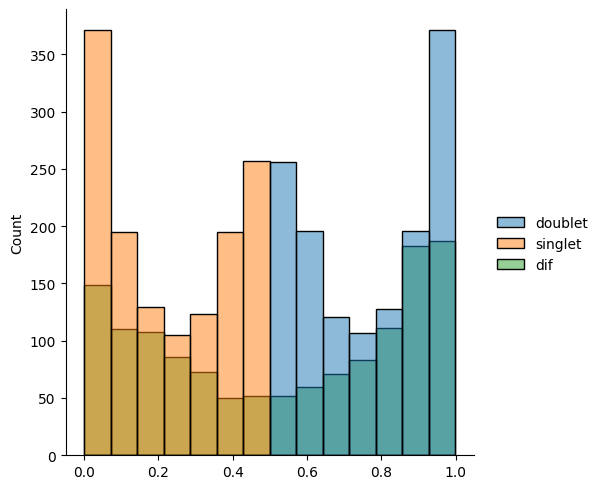

In [40]:
import seaborn as sns
import matplotlib as plt

df['dif'] = df.doublet - df.singlet

sns.displot(df[df.prediction == 'doublet'])
# Set the x-axis limits to range from -3 to 3
xlim(-3, 0)

# Show the plot
plt.show()

In [41]:
df

,doublet,singlet,prediction,dif
0,0.443934,0.556066,singlet,-0.112132
1,0.225110,0.774889,singlet,-0.549779
2,0.157155,0.842845,singlet,-0.685691
3,0.322898,0.677103,singlet,-0.354205
4,0.088582,0.911418,singlet,-0.822835
...,...,...,...,...
8617,0.097755,0.902245,singlet,-0.804490
8618,0.933573,0.066427,doublet,0.867146
8619,0.353347,0.646653,singlet,-0.293306
8620,0.386389,0.613612,singlet,-0.227223


In [42]:
doublets = df[(df.prediction == 'doublet')&(df.dif > 0)]
doublets

,doublet,singlet,prediction,dif
6,0.853626,0.146374,doublet,0.707253
19,0.910430,0.089570,doublet,0.820860
30,0.625163,0.374837,doublet,0.250326
35,0.646497,0.353503,doublet,0.292994
39,0.976884,0.023116,doublet,0.953768
...,...,...,...,...
8608,0.507638,0.492362,doublet,0.015276
8610,0.788512,0.211488,doublet,0.577024
8611,0.745382,0.254618,doublet,0.490763
8612,0.505367,0.494633,doublet,0.010733


In [43]:
adata.obs

,cell_id,_scvi_batch,_scvi_labels
0,AAACCCAAGCTCTTCC-1,0,0
1,AAACCCACAATCTCTT-1,0,0
2,AAACCCACATCCTTGC-1,0,0
3,AAACCCAGTCTGGTTA-1,0,0
4,AAACCCATCATAAGGA-1,0,0
...,...,...,...
8617,TTTGTTGCAGGTGTGA-1,0,0
8618,TTTGTTGGTGACACAG-1,0,0
8619,TTTGTTGTCATTACCT-1,0,0
8620,TTTGTTGTCGTTCGCT-1,0,0


In [44]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata = adata[~adata.obs.doublet] 
adata.obs

,cell_id,_scvi_batch,_scvi_labels,doublet
0,AAACCCAAGCTCTTCC-1,0,0,False
1,AAACCCACAATCTCTT-1,0,0,False
2,AAACCCACATCCTTGC-1,0,0,False
3,AAACCCAGTCTGGTTA-1,0,0,False
4,AAACCCATCATAAGGA-1,0,0,False
...,...,...,...,...
8616,TTTGTTGCAATCCAGT-1,0,0,False
8617,TTTGTTGCAGGTGTGA-1,0,0,False
8619,TTTGTTGTCATTACCT-1,0,0,False
8620,TTTGTTGTCGTTCGCT-1,0,0,False


In [45]:
adata

View of AnnData object with n_obs × n_vars = 7247 × 36601
    obs: 'cell_id', '_scvi_batch', '_scvi_labels', 'doublet'
    var: 'gene_id'
    uns: '_scvi_uuid', '_scvi_manager_uuid'

<font size="5"> Preprocessing steps, getting rid of mitochondrial and ribosomal genes

In [47]:
adata.var

,gene_id
0,MIR1302-2HG
1,FAM138A
2,OR4F5
3,AL627309.1
4,AL627309.3
...,...
36596,AC141272.1
36597,AC023491.2
36598,AC007325.1
36599,AC007325.4


In [48]:
# Ensure the gene names are case-insensitive and stripped of any whitespace
#mito_genes = adata.var[adata.var.index.str.strip().str.lower().str.startswith('mt-')]

# Display the mitochondrial genes
#print(mito_genes)

# Check a few gene names from the dataset
adata.var

# Example check for known mitochondrial genes
print(adata.var[adata.var.index.isin(['MT-CO1', 'MT-ATP6'])])




Empty DataFrame
Columns: [gene_id]
Index: []


there don't appear to be mitochondrial genes in the data set of top genes. Next, filter genes that don't appear in at least 3 cells. 

In [49]:
adata.var.sort_values('n_cells_by_counts')

KeyError: 'n_cells_by_counts'

In [59]:
import pandas as pd
ribo_url = "https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/KEGG_RIBOSOME.html&fileType=txt"
#ribo_url = "http://software.broadinstitute.org/gsea/msigndb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows = 2, header = None)
ribo_genes

,0
0,"<!-- Copyright (c) 2013-2021 Broad Institute, ..."
1,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
2,"<html xmlns=""http://www.w3.org/1999/xhtml"">"
3,<head>
4,"<base href=""/gsea/"" />"
...,...
82,"Copyright (c) 2004-2023 Broad Institute, I..."
83,</div>
84,</div> <!--wrapper ends here -->
85,</body>


In [50]:
import pandas as pd

# List of ribosomal genes
ribo_genes = [
    "RPL35", "RPL10L", "RPL22L1", "FAU", "RPL13A", "RPL36", "RSL24D1P11", "MRPL13", 
    "RPSA", "RPL10A", "RPS27L", "RPL26L1", "RSL24D1", "RPL3", "RPL3L", "RPL4", "RPL5", 
    "RPL6", "RPL7", "RPL7A", "RPL8", "RPL9", "RPL10", "RPL11", "RPL12", "RPL13", "RPL15", 
    "RPL17", "RPL18", "RPL18A", "RPL19", "RPL21", "RPL22", "RPL23A", "RPL24", "RPL26", 
    "RPL27", "RPL30", "RPL27A", "RPL28", "RPL29", "RPL31", "RPL32", "RPL34", "RPL35A", 
    "RPL36AL", "RPL37", "RPL37A", "RPL38", "RPL39", "RPL41", "RPL36A", "RPLP0", "RPLP1", 
    "RPLP2", "RPS2", "RPS3", "RPS3A", "RPS4X", "RPS4Y1", "RPS5", "RPS6", "RPS7", "RPS8", 
    "RPS9", "RPS10", "RPS11", "RPS12", "RPS13", "RPS15", "RPS15A", "RPS16", "RPS17", "RPS18", 
    "RPS19", "RPS20", "RPS21", "RPS23", "RPS24", "RPS25", "RPS26", "RPS27", "RPS27A", "RPS28", 
    "RPS29", "UBA52", "RPL14", "RPL23"
]

ribo_genes =pd.DataFrame(ribo_genes)
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

adata.var



/tmp/ipykernel_99589/2451856647.py:18: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)


,gene_id,ribo
0,MIR1302-2HG,False
1,FAM138A,False
2,OR4F5,False
3,AL627309.1,False
4,AL627309.3,False
...,...,...
36596,AC141272.1,False
36597,AC023491.2,False
36598,AC007325.1,False
36599,AC007325.4,False


In [51]:
#calculate qc metrics
sc.pp.calculate_qc_metrics(adata, qc_vars = ['ribo'], percent_top = None, log1p = False, inplace = True)


In [52]:
adata.var.sort_values('n_cells_by_counts')

,gene_id,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
19730,OR9I1,False,0,0.000000,100.000000,0
4454,IGKV2D-10,False,0,0.000000,100.000000,0
4453,IGKV3D-11,False,0,0.000000,100.000000,0
4452,IGKV1D-12,False,0,0.000000,100.000000,0
4451,IGKV1D-13,False,0,0.000000,100.000000,0
...,...,...,...,...,...,...
36565,MT-CO3,False,7166,134.031323,1.117704,971325
9979,MAP1B,False,7168,30.281220,1.090106,219448
21658,TUBA1A,False,7182,69.995998,0.896923,507261
35378,TMSB4X,False,7201,127.910584,0.634745,926968


The genes were all found in at least 3 cells

In [53]:
adata.obs.sort_values('total_counts')
#since the cells have only 10 genes in some cases, 
#we'll filter the cells so that they have at least 200 genes each. 
sc.pp.filter_cells(adata, min_genes = 200) 

In [54]:
adata.obs.sort_values('total_counts')

,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes
3525,CTATAGGCACGGTGAA-1,0,0,False,364,501,0,0.0,364
6396,TAGACCAGTCTCTCCA-1,0,0,False,436,507,0,0.0,436
6497,TATCAGGAGGTTGGAC-1,0,0,False,246,511,0,0.0,246
7677,TGCTTCGGTCTAGTGT-1,0,0,False,399,511,0,0.0,399
1098,AGATGAACATGGGCAA-1,0,0,False,413,513,0,0.0,413
...,...,...,...,...,...,...,...,...,...
4783,GCCAGCAGTAATGCTC-1,0,0,False,8587,51736,0,0.0,8587
252,AAGATAGTCAATCCGA-1,0,0,False,8814,52154,0,0.0,8814
8041,TTAATCCAGCCGTAAG-1,0,0,False,8437,52626,0,0.0,8437
6670,TCACGCTCATTGACTG-1,0,0,False,8808,53811,0,0.0,8808


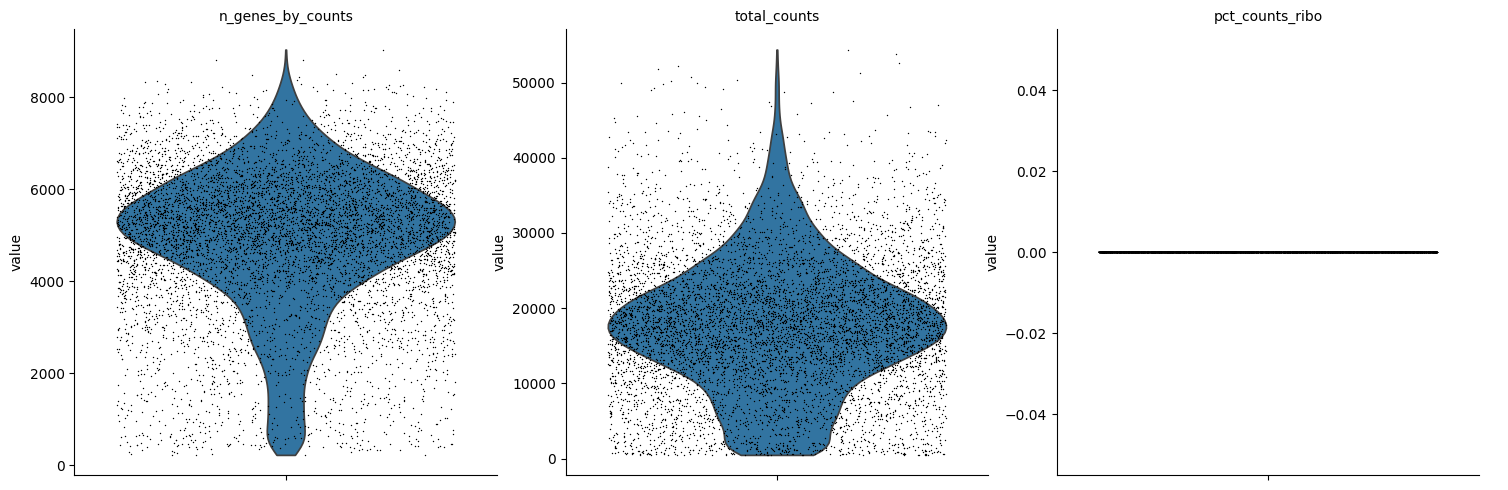

In [55]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo'], jitter = 0.4, multi_panel = True)

In [56]:
import numpy as np
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, 0.98)
#upper_lim = 7553.49

7553.499999999997

In [57]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim] 
adata.obs

,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes
0,AAACCCAAGCTCTTCC-1,0,0,False,4926,17166,0,0.0,4926
1,AAACCCACAATCTCTT-1,0,0,False,6078,25218,0,0.0,6078
2,AAACCCACATCCTTGC-1,0,0,False,6025,23490,0,0.0,6025
3,AAACCCAGTCTGGTTA-1,0,0,False,5020,17642,0,0.0,5020
4,AAACCCATCATAAGGA-1,0,0,False,5302,20481,0,0.0,5302
...,...,...,...,...,...,...,...,...,...
8615,TTTGTTGCAAGCACCC-1,0,0,False,4990,16140,0,0.0,4990
8617,TTTGTTGCAGGTGTGA-1,0,0,False,4173,14138,0,0.0,4173
8619,TTTGTTGTCATTACCT-1,0,0,False,6564,28336,0,0.0,6564
8620,TTTGTTGTCGTTCGCT-1,0,0,False,6379,25396,0,0.0,6379


<font size="5"> Normalization

In [81]:
adata.X.sum(axis = 1)

matrix([[3615],
        [2224],
        [2325],
        ...,
        [2793],
        [4258],
        [1565]])

In [82]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [83]:
adata.X.sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [84]:
adata.raw = adata

<font size="5"> Clustering

In [87]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)


/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scipy/sparse/_data.py:149: RuntimeWarning: overflow encountered in expm1
  result = op(self._deduped_data())


ValueError: cannot specify integer `bins` when input data contains infinity

In [89]:
import scipy.sparse

# Check if the matrix is sparse
is_sparse = scipy.sparse.issparse(adata.X)
print(f"Is the matrix sparse? {is_sparse}")


Is the matrix sparse? True


In [90]:
import scipy.sparse

# Identify and replace infinite values in sparse matrix
# This is a more complicated process because we need to iterate over non-zero elements of the sparse matrix

# Get the indices of non-zero elements in the sparse matrix
row, col = adata.X.nonzero()

# Get the values of the non-zero elements
values = adata.X[row, col].toarray().flatten()

# Replace infinity with NaN or another value
values[np.isinf(values)] = np.nan  # Or set to 0 if preferred

# Update the sparse matrix with the modified values
adata.X[row, col] = values


AttributeError: 'matrix' object has no attribute 'toarray'

In [93]:
print(type(adata.X))

# Convert sparse matrix to dense format
adata.X = adata.X.todense()

# Convert to numpy array
adata.X = np.asarray(adata.X)

# Replace infinity values with NaN
adata.X[np.isinf(adata.X)] = np.nan

# Replace NaN values with 0
adata.X[np.isnan(adata.X)] = 0




<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [94]:
# Replace infinity values with NaN
adata.X[np.isinf(adata.X)] = np.nan


In [95]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)


/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:295: RuntimeWarning: overflow encountered in expm1
  np.expm1(X, out=X)
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scanpy/_utils/__init__.py:555: RuntimeWarning: overflow encountered in multiply
  return x * y
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:41: RuntimeWarning: overflow encountered in square
  var = mean_sq - mean**2
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:41: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean**2


ValueError: cannot specify integer `bins` when input data contains infinity

In [100]:
import numpy as np

# Replace both positive and negative infinity with NaN
adata.X[adata.X == np.inf] = np.nan
adata.X[adata.X == -np.inf] = np.nan

# Replace NaN values with 0
adata.X[np.isnan(adata.X)] = 0

# Convert sparse matrix to dense
#adata.X = adata.X.toarray()


# Identify highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)


ValueError: cannot specify integer `bins` when input data contains infinity

In [101]:
import numpy as np

# Replace both positive and negative infinity with NaN
adata.X[adata.X == np.inf] = np.nan
adata.X[adata.X == -np.inf] = np.nan

# Replace NaN values with 0 (or another method of imputation if needed)
adata.X = np.nan_to_num(adata.X, nan=0.0)

# Check for any remaining NaNs or Infs
if np.any(np.isnan(adata.X)):
    print("Warning: NaNs still present in data.")
if np.any(np.isinf(adata.X)):
    print("Warning: Infs still present in data.")

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)


ValueError: cannot specify integer `bins` when input data contains infinity

In [105]:
adata.X

array([[ 2.76625173,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 31.47482014,  8.99280576, ..., 31.47482014,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  8.60215054,
         0.        ,  0.        ],
       ...,
       [ 0.        , 35.8037952 , 32.22341568, ..., 32.22341568,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  9.39408173,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
# Filter genes expressed in fewer than 10 cells
sc.pp.filter_genes(adata, min_cells=10)


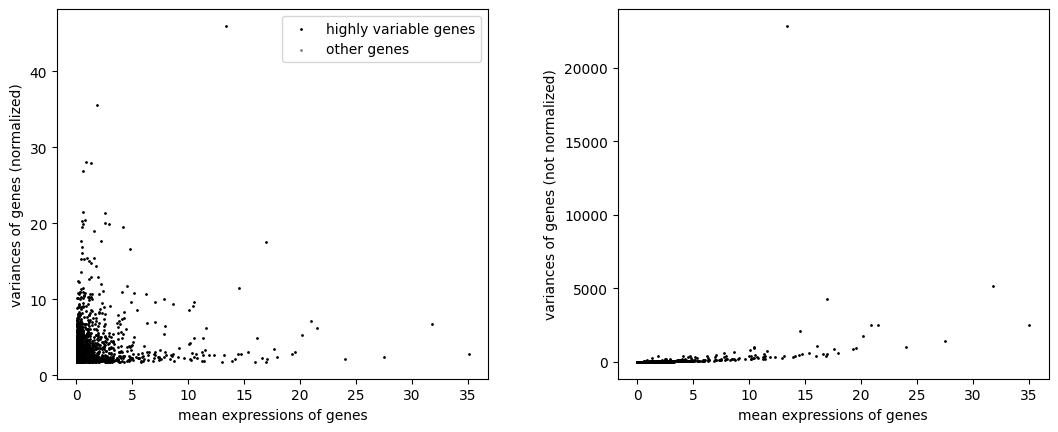

In [108]:
sc.pl.highly_variable_genes(adata)

In [109]:
adata = adata[:, adata.var.highly_variable]

In [111]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_ribo'])

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:668: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [112]:
sc.pp.scale(adata, max_value = 10)

In [113]:
sc.tl.pca(adata, svd_solver = 'arpack')

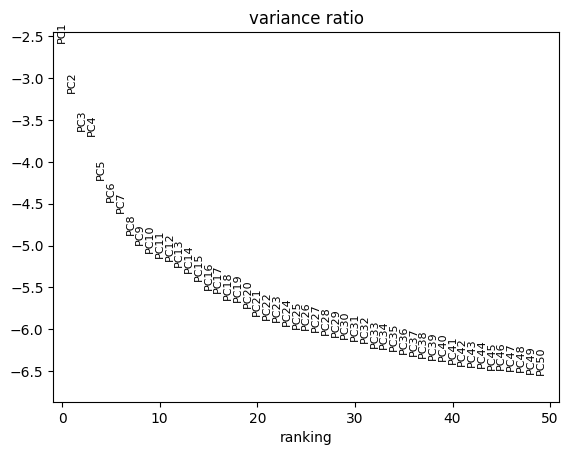

In [114]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [115]:
 sc.pp.neighbors(adata, n_pcs = 30)

In [117]:
adata.obsp['connectivities']

<6981x6981 sparse matrix of type '<class 'numpy.float32'>'
	with 139644 stored elements in Compressed Sparse Row format>

In [118]:
sc.tl.umap(adata)

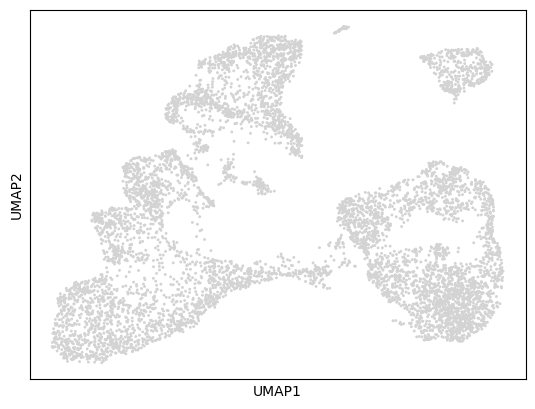

In [119]:
sc.pl.umap(adata)

In [124]:
sc.tl.leiden(adata, resolution = 0.8)

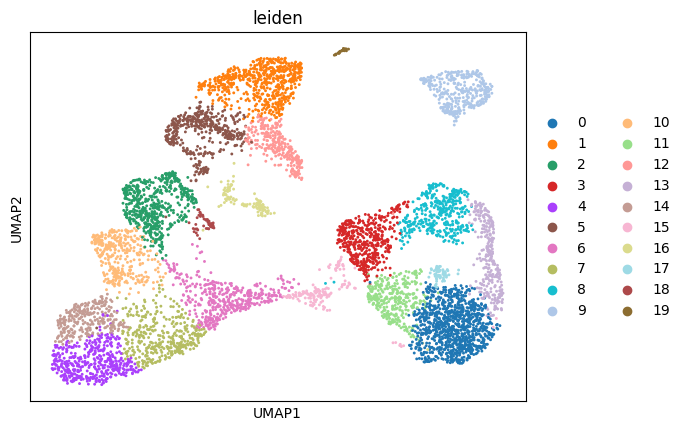

In [125]:
sc.pl.umap(adata, color = ['leiden'])

Next step is to repeat the processing and normalization for the other sample and then integrate them.

In [12]:
import scanpy as sc

# Load the adata object from the .h5ad file
fetal_adata = sc.read('fetal_adata_file.h5ad')
fetal_adata


AnnData object with n_obs × n_vars = 8785 × 35780
    obs: 'cell_id'
    var: 'gene_id'

In [3]:
import scvi

print(scvi.__version__)

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.1.6.post2


In [13]:
import scvi
import scanpy as sc

# Ensure the matrix is in CSR format
fetal_adata.X = fetal_adata.X.tocsr()  # Convert COO -> CSR

# Now apply the gene filtering
sc.pp.filter_genes(fetal_adata, min_cells=10)

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sc.pp.highly_variable_genes(fetal_adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [16]:
import scvi
import torch

import scvi

# Assuming you already have the AnnData object `adata`
# Step 1: Setup AnnData
scvi.model.SCVI.setup_anndata(fetal_adata)

# Step 2: Create the SCVI model
model = scvi.model.SCVI(fetal_adata)

# Step 3: Train the model with the number of epochs specified
model.train(max_epochs=400)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 10/400:   2%| | 9/400 [1:30:51<65:46:57, 605.67s/it, v_num=1, train_loss_step=1.67e+4, train_loss_epoch=1.
Epoch 400/400: 100%|█| 400/400 [2:00:13<00:00, 17.07s/it, v_num=1, train_loss_step=1.52e+4, train_loss_epoch=1.5

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [2:00:13<00:00, 18.03s/it, v_num=1, train_loss_step=1.52e+4, train_loss_epoch=1.5


In [17]:
import torch
print(torch.cuda.is_available())  # Should return True if a GPU is available
print(torch.cuda.device_count())  # Number of GPUs
print(torch.cuda.get_device_name(0))  # Name of the first GPU


False
0


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [18]:
solo = scvi.external.SOLO.from_scvi_model(model)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader

Epoch 268/400:  67%|█▎| 268/400 [03:24<01:40,  1.31it/s, v_num=1, train_loss_step=0.196, train_loss_epoch=0.138]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.132. Signaling Trainer to stop.


In [19]:
df2 = solo.predict()

df2['prediction'] = solo.predict(soft = False)
df2

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
0,4.984705e-06,0.999995,singlet
1,3.713841e-01,0.628616,singlet
2,2.248193e-02,0.977518,singlet
3,1.856408e-10,1.000000,singlet
4,2.322561e-02,0.976774,singlet
...,...,...,...
8780,9.509652e-01,0.049035,doublet
8781,3.071766e-09,1.000000,singlet
8782,6.678503e-03,0.993321,singlet
8783,3.261163e-04,0.999674,singlet


In [20]:
df2.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,801,801
singlet,7984,7984


NameError: name 'xlim' is not defined

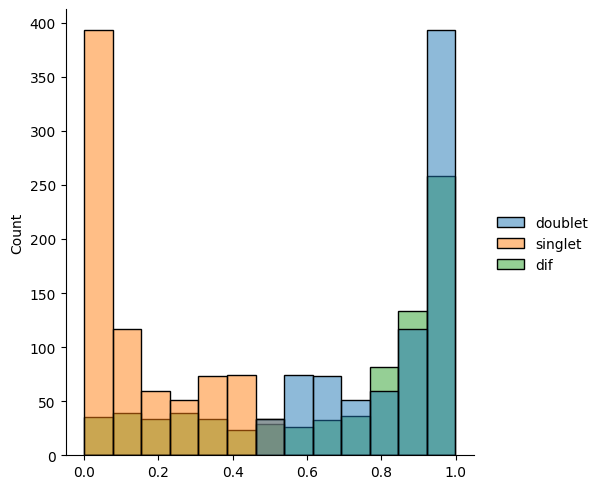

In [21]:
import seaborn as sns
import matplotlib as plt

df2['dif'] = df2.doublet - df2.singlet

sns.displot(df2[df2.prediction == 'doublet'])
# Set the x-axis limits to range from -3 to 3
xlim(-3, 0)

# Show the plot
plt.show()

In [22]:
doublets = df2[(df2.prediction == 'doublet')&(df2.dif > 0)]
doublets

,doublet,singlet,prediction,dif
7,0.843258,0.156742,doublet,0.686517
16,0.663262,0.336738,doublet,0.326523
22,0.829522,0.170478,doublet,0.659044
91,0.989872,0.010128,doublet,0.979743
123,0.700626,0.299374,doublet,0.401252
...,...,...,...,...
8766,0.971717,0.028283,doublet,0.943434
8769,0.990712,0.009288,doublet,0.981424
8771,0.694708,0.305292,doublet,0.389416
8774,0.933791,0.066209,doublet,0.867581


In [23]:
fetal_adata.obs['doublet'] = fetal_adata.obs.index.isin(doublets.index)
fetal_adata = fetal_adata[~fetal_adata.obs.doublet] 
fetal_adata.obs

,cell_id,_scvi_batch,_scvi_labels,doublet
0,AAACGCTAGTACGTCT,0,0,False
1,ACATTTCAGATCCCAT,0,0,False
2,ATCCCTGAGATGGCAC,0,0,False
3,ATTCACTTCCGCACTT,0,0,False
4,TATATCCCATTGGCAT,0,0,False
...,...,...,...,...
8779,TTTGGTTCAAGGTACG,0,0,False
8781,AGTCACAAGCCGATTT,0,0,False
8782,CTGGACGTCCATTCAT,0,0,False
8783,TCATCCGGTAGGTCAG,0,0,False


In [24]:
fetal_adata

View of AnnData object with n_obs × n_vars = 7984 × 28663
    obs: 'cell_id', '_scvi_batch', '_scvi_labels', 'doublet'
    var: 'gene_id', 'n_cells'
    uns: '_scvi_uuid', '_scvi_manager_uuid'

In [25]:
# Ensure the gene names are case-insensitive and stripped of any whitespace
#mito_genes = adata.var[adata.var.index.str.strip().str.lower().str.startswith('mt-')]

# Display the mitochondrial genes
#print(mito_genes)

# Check a few gene names from the dataset
fetal_adata.var

# Example check for known mitochondrial genes
print(fetal_adata.var[fetal_adata.var.index.isin(['MT-CO1', 'MT-ATP6'])])



Empty DataFrame
Columns: [gene_id, n_cells]
Index: []


In [26]:
import pandas as pd

# List of ribosomal genes
ribo_genes = [
    "RPL35", "RPL10L", "RPL22L1", "FAU", "RPL13A", "RPL36", "RSL24D1P11", "MRPL13", 
    "RPSA", "RPL10A", "RPS27L", "RPL26L1", "RSL24D1", "RPL3", "RPL3L", "RPL4", "RPL5", 
    "RPL6", "RPL7", "RPL7A", "RPL8", "RPL9", "RPL10", "RPL11", "RPL12", "RPL13", "RPL15", 
    "RPL17", "RPL18", "RPL18A", "RPL19", "RPL21", "RPL22", "RPL23A", "RPL24", "RPL26", 
    "RPL27", "RPL30", "RPL27A", "RPL28", "RPL29", "RPL31", "RPL32", "RPL34", "RPL35A", 
    "RPL36AL", "RPL37", "RPL37A", "RPL38", "RPL39", "RPL41", "RPL36A", "RPLP0", "RPLP1", 
    "RPLP2", "RPS2", "RPS3", "RPS3A", "RPS4X", "RPS4Y1", "RPS5", "RPS6", "RPS7", "RPS8", 
    "RPS9", "RPS10", "RPS11", "RPS12", "RPS13", "RPS15", "RPS15A", "RPS16", "RPS17", "RPS18", 
    "RPS19", "RPS20", "RPS21", "RPS23", "RPS24", "RPS25", "RPS26", "RPS27", "RPS27A", "RPS28", 
    "RPS29", "UBA52", "RPL14", "RPL23"
]

ribo_genes =pd.DataFrame(ribo_genes)
fetal_adata.var['ribo'] = fetal_adata.var_names.isin(ribo_genes[0].values)

fetal_adata.var


/tmp/ipykernel_99589/3943514621.py:18: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  fetal_adata.var['ribo'] = fetal_adata.var_names.isin(ribo_genes[0].values)


,gene_id,n_cells,ribo
0,WASH7P,882,False
1,AL627309.6,10,False
2,AL627309.5,29,False
3,WASH9P,197,False
4,AP006222.1,59,False
...,...,...,...
35774,AC011043.1,3529,False
35776,AL354822.1,12,False
35777,AL592183.1,3213,False
35778,AC240274.1,1771,False


In [27]:
#calculate qc metrics
sc.pp.calculate_qc_metrics(fetal_adata, qc_vars = ['ribo'], percent_top = None, log1p = False, inplace = True)


In [28]:
fetal_adata.var.sort_values('n_cells_by_counts')

,gene_id,n_cells,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
1981,H2AC18,12,False,4,0.000501,99.949900,4
3458,AC093326.1,10,False,5,0.000626,99.937375,5
34045,AC004882.3,10,False,5,0.000626,99.937375,5
14184,NFE4,12,False,5,0.000752,99.937375,6
31066,AC010636.1,10,False,5,0.000752,99.937375,6
...,...,...,...,...,...,...,...
35744,MT-RNR2,8785,False,7984,161.100326,0.000000,1286225
21032,GAPDH,8785,False,7984,53.836924,0.000000,429834
34272,RPL3,8785,False,7984,43.546217,0.000000,347673
35621,RPL10,8785,False,7984,66.589930,0.000000,531654


In [29]:
fetal_adata.obs.sort_values('total_counts')
#since the cells have only 10 genes in some cases, 
#we'll filter the cells so that they have at least 200 genes each. 
sc.pp.filter_cells(fetal_adata, min_genes = 200) 

In [30]:
fetal_adata.obs.sort_values('total_counts')

,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes
8353,GGTCACGGTAGTATAG,0,0,False,2744,5006,0,0.0,2744
2074,TTTGATCGTCAGCGTC,0,0,False,2460,5022,0,0.0,2460
1621,TGAACGTAGTCGAGGT,0,0,False,2525,5186,0,0.0,2525
5770,GGGCTACGTCAATCTG,0,0,False,2815,5193,0,0.0,2815
3099,ACCTGAACAAGTGGGT,0,0,False,2561,5204,0,0.0,2561
...,...,...,...,...,...,...,...,...,...
1,ACATTTCAGATCCCAT,0,0,False,4115,39682,0,0.0,4115
8699,ATTATCCAGGCAATGC,0,0,False,8489,39715,0,0.0,8489
3677,ATCCGTCCACGTCTCT,0,0,False,8225,39814,0,0.0,8225
6968,TCTGCCACACAAGCCC,0,0,False,8235,40259,0,0.0,8235


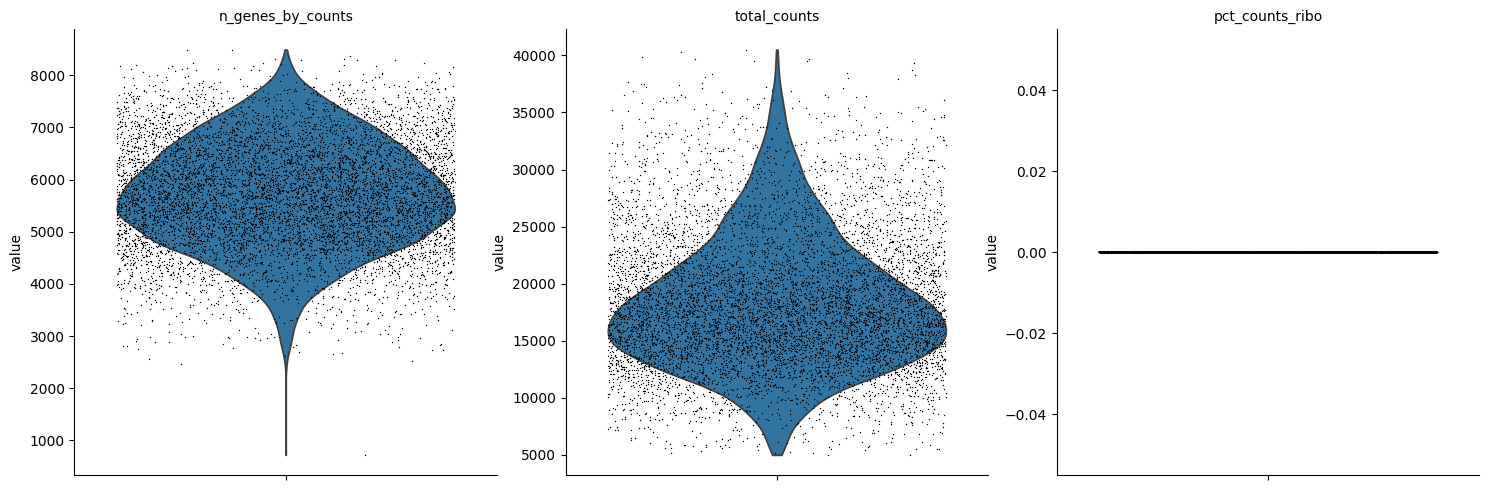

In [31]:
sc.pl.violin(fetal_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo'], jitter = 0.4, multi_panel = True)

In [32]:
import numpy as np
upper_lim = np.quantile(fetal_adata.obs.n_genes_by_counts.values, 0.98)
#upper_lim = 7658.68

7658.68

In [33]:
fetal_adata = fetal_adata[fetal_adata.obs.n_genes_by_counts < upper_lim] 
fetal_adata.obs

,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes
0,AAACGCTAGTACGTCT,0,0,False,2976,20062,0,0.0,2976
1,ACATTTCAGATCCCAT,0,0,False,4115,39682,0,0.0,4115
2,ATCCCTGAGATGGCAC,0,0,False,724,19598,0,0.0,724
3,ATTCACTTCCGCACTT,0,0,False,3000,10824,0,0.0,3000
4,TATATCCCATTGGCAT,0,0,False,3568,31009,0,0.0,3568
...,...,...,...,...,...,...,...,...,...
8779,TTTGGTTCAAGGTACG,0,0,False,5086,15994,0,0.0,5086
8781,AGTCACAAGCCGATTT,0,0,False,5256,17254,0,0.0,5256
8782,CTGGACGTCCATTCAT,0,0,False,6929,31204,0,0.0,6929
8783,TCATCCGGTAGGTCAG,0,0,False,6487,28260,0,0.0,6487


<font size="5">Preparation for integration

In [60]:
# Assuming 'adata' is your AnnData object
#fetal_adata.write('preprocessed_fetal_adata.h5ad')
#adata.write('preprocessed_ipsc_adata.h5ad')
fetal_adata.var

,gene_id,n_cells,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
0,WASH7P,882,False,743,0.097320,90.693888,777
1,AL627309.6,10,False,9,0.001127,99.887275,9
2,AL627309.5,29,False,24,0.003006,99.699399,24
3,WASH9P,197,False,164,0.021293,97.945892,170
4,AP006222.1,59,False,48,0.006012,99.398798,48
...,...,...,...,...,...,...,...
35774,AC011043.1,3529,False,3061,0.511899,61.660822,4087
35776,AL354822.1,12,False,9,0.001127,99.887275,9
35777,AL592183.1,3213,False,2808,0.479459,64.829659,3828
35778,AC240274.1,1771,False,1496,0.221568,81.262525,1769


In [72]:
import scanpy as sc

# Load the individual AnnData objects (replace with your file paths)
adata = sc.read('preprocessed_ipsc_adata.h5ad')
fetal_adata = sc.read('preprocessed_fetal_adata.h5ad')

# Add a new column to label the sample in each AnnData object
adata.obs['sample'] = 'ipsc'
fetal_adata.obs['sample'] = 'fetal'

# Ensure gene names are used as the index
adata.var_names = adata.var["gene_id"]
fetal_adata.var_names = fetal_adata.var["gene_id"]

# Remove any duplicate gene names (Scanpy requires unique indices)
adata.var_names_make_unique()
fetal_adata.var_names_make_unique()

# Concatenate them along the first axis (obs axis)
#adata_concat = sc.concat([adata, fetal_adata], label='batch', keys=['ipsc', 'fetal'])

# Save the concatenated AnnData object
#adata_concat.write('concatenated_samples.h5ad')


# Ensure gene_id is stored as a column before concatenation
adata.var["gene_id"] = adata.var.index
fetal_adata.var["gene_id"] = fetal_adata.var.index

# Perform concatenation while labeling the batches
#adata_concat = sc.concat(
#    [adata, fetal_adata],
#    label='batch',  # Create a 'batch' column in `.obs` to track origin
#    keys=['ipsc', 'fetal'],  # Labels for each dataset
#    join='outer'  # Keeps all genes from both datasets
#)

# Concatenate while preserving gene names
adata_concat = sc.concat(
    [adata, fetal_adata],
    label="batch",
    keys=["ipsc", "fetal"],
    join="outer",  # Ensures no genes are dropped
)

# Check that genes are correctly labeled
print(adata_concat.var_names[:10])  # Should display gene names, NOT numbers


# Restore gene_id as the index after concatenation
#adata_concat.var.index = adata_concat.var["gene_id"]

# Save the final concatenated AnnData object
adata_concat.write("combined_adata2.h5ad")



/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2ML1-AS2', 'A2MP1', 'A3GALT2'],
      dtype='object', name='gene_id')


In [77]:
adata_concat

AnnData object with n_obs × n_vars = 14925 × 39886
    obs: 'cell_id', '_scvi_batch', '_scvi_labels', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'sample', 'batch'
    layers: 'counts'

In [71]:
adata = sc.read('preprocessed_ipsc_adata.h5ad')
#fetal_adata2 = sc.read('sample2.h5ad')
adata

,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes
0,AAACCCAAGCTCTTCC-1,0,0,False,4926,17166,0,0.0,4926
1,AAACCCACAATCTCTT-1,0,0,False,6078,25218,0,0.0,6078
2,AAACCCACATCCTTGC-1,0,0,False,6025,23490,0,0.0,6025
3,AAACCCAGTCTGGTTA-1,0,0,False,5020,17642,0,0.0,5020
4,AAACCCATCATAAGGA-1,0,0,False,5302,20481,0,0.0,5302
...,...,...,...,...,...,...,...,...,...
8615,TTTGTTGCAAGCACCC-1,0,0,False,4990,16140,0,0.0,4990
8617,TTTGTTGCAGGTGTGA-1,0,0,False,4173,14138,0,0.0,4173
8619,TTTGTTGTCATTACCT-1,0,0,False,6564,28336,0,0.0,6564
8620,TTTGTTGTCGTTCGCT-1,0,0,False,6379,25396,0,0.0,6379


In [28]:
adata1 = sc.read('ipsc_adata_file.h5ad')
adata1

AnnData object with n_obs × n_vars = 8622 × 36601
    obs: 'cell_id'
    var: 'gene_id'

In [75]:
adata_concat.X

<14925x39886 sparse matrix of type '<class 'numpy.int64'>'
	with 78552996 stored elements in Compressed Sparse Row format>

In [82]:
adata_concat.obs.groupby('sample').count()

/tmp/ipykernel_99589/539876379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_concat.obs.groupby('sample').count()


,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes,batch
sample,,,,,,,,,,
fetal,7824,7824,7824,7824,7824,7824,7824,7824,7824,7824
ipsc,7101,7101,7101,7101,7101,7101,7101,7101,7101,7101


In [86]:
#Save the raw data
adata_concat.layers['counts'] = adata_concat.X.copy()

In [83]:
sc.pp.filter_genes(adata_concat, min_cells = 100)

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [85]:
adata_concat

AnnData object with n_obs × n_vars = 14925 × 21763
    obs: 'cell_id', '_scvi_batch', '_scvi_labels', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'sample', 'batch'
    var: 'n_cells'
    layers: 'counts'

In [87]:
#Normalize the counts to 10,000 UMI, convert to log
sc.pp.normalize_total(adata_concat, target_sum = 1e4)
sc.pp.log1p(adata_concat)
adata_concat.raw = adata_concat


In [88]:
adata_concat.obs.head()

,cell_id,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,n_genes,sample,batch
0,AAACCCAAGCTCTTCC-1,0,0,False,4926,17166,0,0.0,4926,ipsc,ipsc
1,AAACCCACAATCTCTT-1,0,0,False,6078,25218,0,0.0,6078,ipsc,ipsc
2,AAACCCACATCCTTGC-1,0,0,False,6025,23490,0,0.0,6025,ipsc,ipsc
3,AAACCCAGTCTGGTTA-1,0,0,False,5020,17642,0,0.0,5020,ipsc,ipsc
4,AAACCCATCATAAGGA-1,0,0,False,5302,20481,0,0.0,5302,ipsc,ipsc


In [90]:
#Downsample the number of genes so that they are about half of the number of cells. 
#Since I have 14,000 cells, I'll downsample to 8000 highly expressed genes. 
sc.pp.highly_variable_genes(adata_concat, n_top_genes = 8000, subset = True, layer = 'counts', flavor = "seurat_v3", batch_key = "sample")

/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [91]:
adata_concat

AnnData object with n_obs × n_vars = 14925 × 8000
    obs: 'cell_id', '_scvi_batch', '_scvi_labels', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'sample', 'batch'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [92]:
scvi.model.SCVI.setup_anndata(adata_concat, layer = "counts", categorical_covariate_keys = ['sample'], 
                              continuous_covariate_keys = ['pct_counts_ribo', 'total_counts'])

In [93]:
model = scvi.model.SCVI(adata_concat)

In [94]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|█| 400/400 [54:06<00:00,  7.97s/it, v_num=1, train_loss_step=4.88e+3, train_loss_epoch=4.83e

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [54:06<00:00,  8.12s/it, v_num=1, train_loss_step=4.88e+3, train_loss_epoch=4.83e


In [95]:
adata_concat.obsm['X_scVI'] = model.get_latent_representation()

In [96]:
adata_concat.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [97]:
sc.pp.neighbors(adata_concat, use_rep = 'X_scVI')

In [102]:
sc.tl.umap(adata_concat)
sc.tl.leiden(adata_concat, resolution = 0.5)

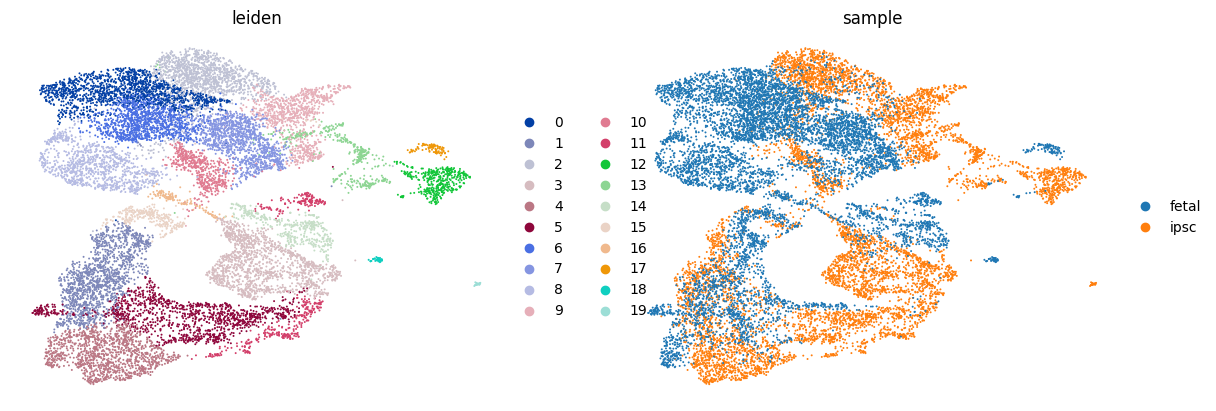

In [103]:
sc.pl.umap(adata_concat, color = ['leiden', 'sample'], frameon = False)

In [104]:
adata_concat.write_h5ad('integrated2.h5ad')

In [105]:
sc.tl.rank_genes_groups(adata_concat, 'leiden')

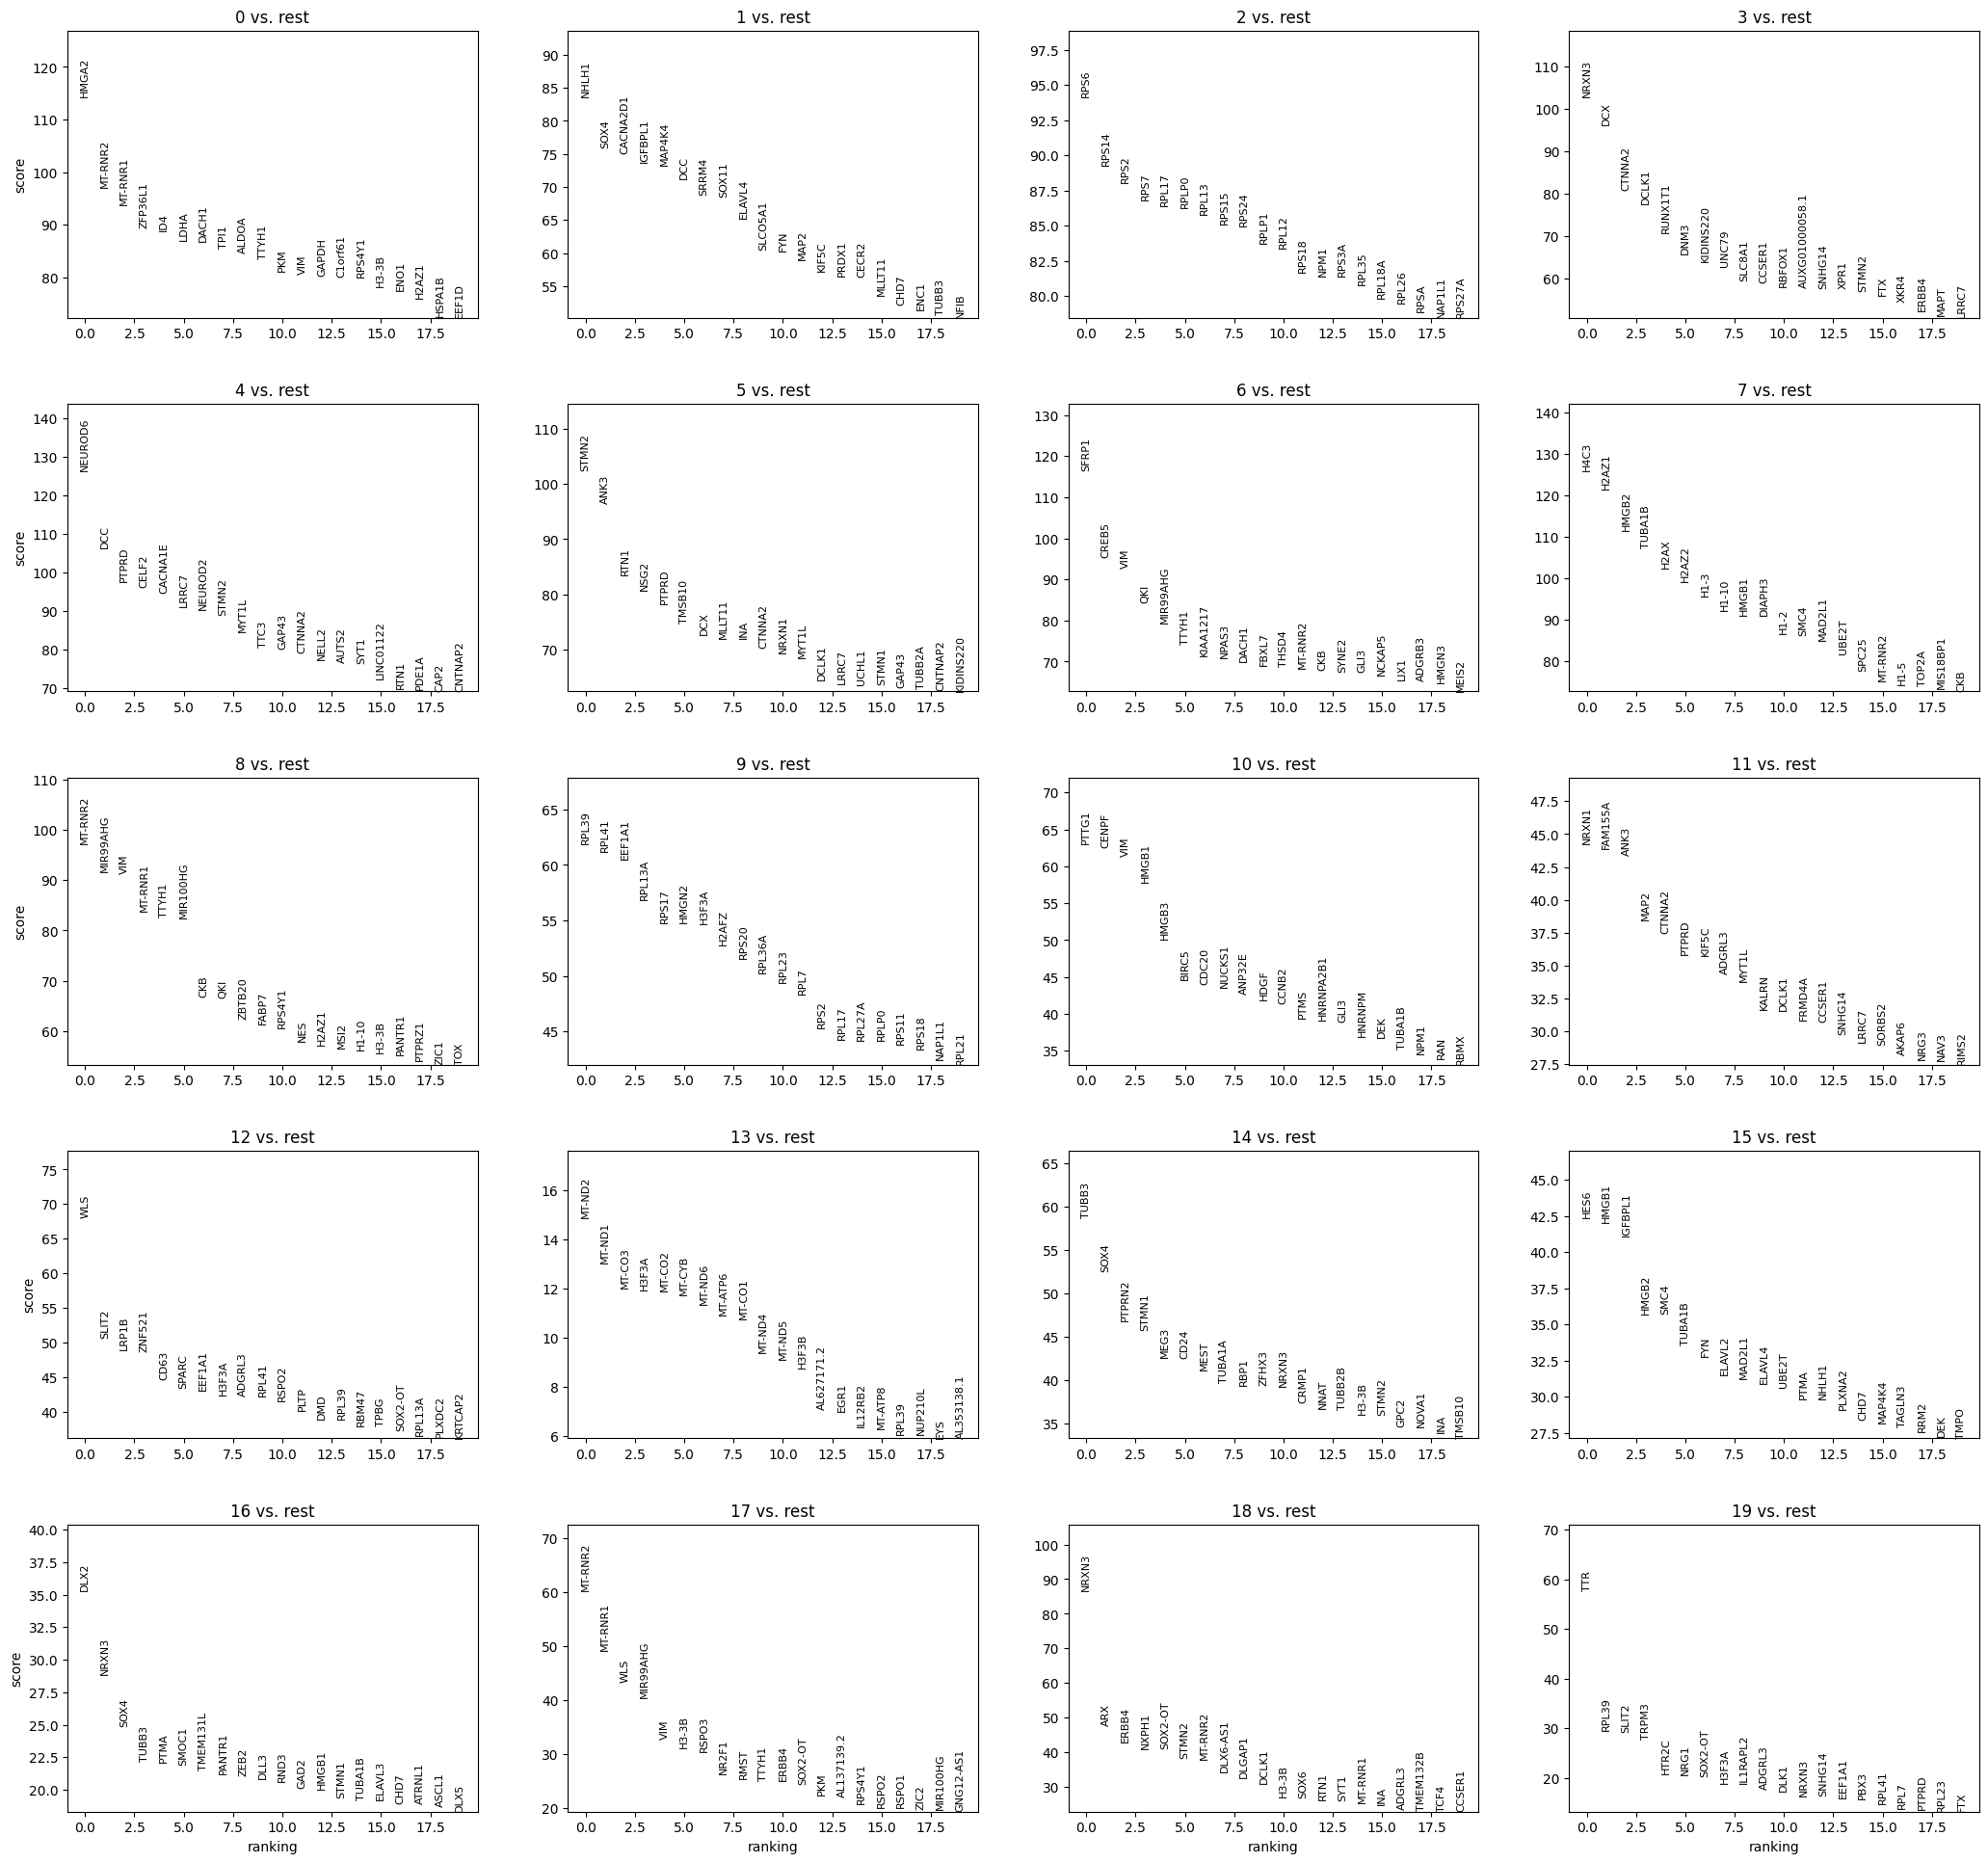

In [106]:
sc.pl.rank_genes_groups(adata_concat, n_genes = 20, sharey = False)

In [107]:
markers = sc.get.rank_genes_groups_df(adata_concat, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]

In [92]:
fetal_adata.var

,gene_id,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
109,HES5,6930,True,1041.0,6.567217,68.744371,2.492788,False,6281,6.065560,22.158880,48943
110,AL139246.5,2189,True,1261.0,0.504041,1.749784,2.241204,False,1891,0.456686,76.564630,3685
134,TP73,207,True,440.0,0.087649,0.519184,3.896039,False,182,0.079688,97.744454,643
138,SMIM1,258,True,1384.0,0.035970,0.131220,2.133951,False,229,0.032470,97.161978,262
152,AJAP1,738,True,1574.0,0.147524,0.444764,1.991118,False,632,0.137192,92.167555,1107
...,...,...,...,...,...,...,...,...,...,...,...,...
35586,BGN,34,True,518.0,0.014684,0.322530,3.569474,False,30,0.015367,99.628207,124
35603,L1CAM,1833,True,1768.0,0.491633,1.428237,1.877935,False,1683,0.480357,79.142397,3876
35638,GAB3,36,True,1769.0,0.006261,0.015785,1.877583,False,32,0.006197,99.603420,50
35659,AC006040.1,51,True,1808.0,0.008423,0.021787,1.855468,False,41,0.007188,99.491883,58


In [108]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|████████████████████████████████████████████████████████████████████| 20/20 [02:22<00:00,  7.11s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
gene_id,,,,,,,,,,,,,,,,,,,,,
XG,0.9868,0.0132,4.314250,0.000066,0.000007,0.0,0.25,4.766558,4.502860,2.642892,...,0.136746,0.027558,0.010519,0.013927,0.184241,0.037016,True,0 vs Rest,0,Rest
AL353803.2,0.9846,0.0154,4.157867,0.000041,0.000006,0.0,0.25,4.600835,4.751826,2.702172,...,0.080645,0.021853,0.015428,0.010297,0.107389,0.027884,True,0 vs Rest,0,Rest
C5orf47,0.9812,0.0188,3.954919,0.000040,0.000005,0.0,0.25,3.795357,3.763720,2.248339,...,0.024544,0.008371,0.009116,0.007556,0.033791,0.011944,True,0 vs Rest,0,Rest
CA3-AS1,0.9808,0.0192,3.933458,0.000035,0.000005,0.0,0.25,4.151878,4.119182,2.308565,...,0.053296,0.018446,0.023142,0.016223,0.074438,0.022831,True,0 vs Rest,0,Rest
CCDC68,0.9798,0.0202,3.881665,0.000026,0.000004,0.0,0.25,4.306026,4.489746,2.275997,...,0.020337,0.007038,0.015428,0.006075,0.025736,0.009214,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCDC91,0.4956,0.5044,-0.017600,0.000325,0.000332,0.0,0.25,-0.001228,-0.019302,0.376636,...,0.931034,2.213413,0.620690,0.726839,5.237703,3.173238,False,19 vs Rest,19,Rest
HP1BP3,0.4758,0.5242,-0.096876,0.000602,0.000642,0.0,0.25,-0.014787,0.034775,0.465495,...,0.862069,4.245771,0.586207,0.921388,4.758116,5.972157,False,19 vs Rest,19,Rest
PIBF1,0.4750,0.5250,-0.100083,0.000274,0.000307,0.0,0.25,-0.131018,-0.118347,0.372228,...,0.310345,2.202806,0.275862,0.763426,1.697251,3.169373,False,19 vs Rest,19,Rest


In [109]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]

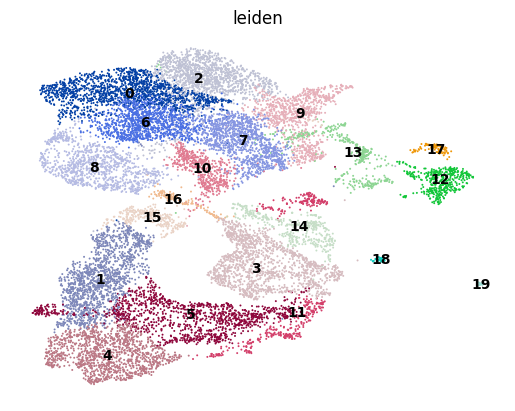

In [110]:
sc.pl.umap(adata_concat, color = ['leiden'], frameon = False, legend_loc = "on data")

In [111]:
for x in range (0, 20):
    print(f'"{x}":"", ')

"0":"", 
"1":"", 
"2":"", 
"3":"", 
"4":"", 
"5":"", 
"6":"", 
"7":"", 
"8":"", 
"9":"", 
"10":"", 
"11":"", 
"12":"", 
"13":"", 
"14":"", 
"15":"", 
"16":"", 
"17":"", 
"18":"", 
"19":"", 


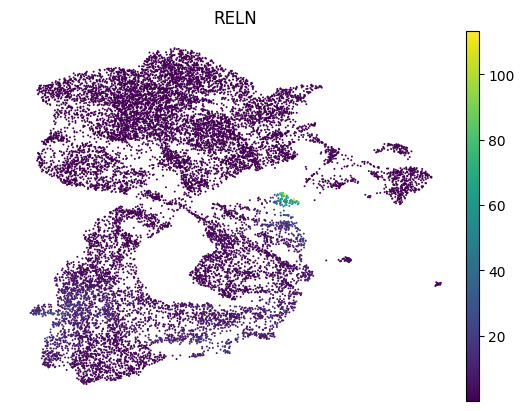

In [148]:
sc.pl.umap(adata_concat, color = [ 'RELN'], frameon = False, layer = 'scvi_normalized')

In [149]:
#For cell labels

cell_type = {"0":"SOX9+ astrocyte", 
"1":"MAP2+, TUBB3+, DCX+ neuron", 
"2":"SOX2+ NPC", 
"3":"CAMK2B+, MAP2+ neuron, subset is SOX2+", 
"4":"KIF5C+, MAP2+, TUBB3+, DCX+, NEUROD6+ neuron", 
"5":"CAMK2B+, DCX+ neuron", 
"6":"PAX6+ NPC", 
"7":"PAX6+ NPC", 
"8":"SOX9+, PAX6+, OLIG1+ astrocyte, NPC, or oligodendrocyte", 
"9":"SOX9+, SOX2+ astrocyte or NPC ", 
"10":"SOX2+, RELN+ NPC", 
"11":"PDGFRA+ OPC", 
"12":"S100B+, SOX2+, CXCR4+ astrocyte or NPC", 
"13":"DCX+ NPC", 
"14":"KIF5C+, MAP2+, TUBB3+ neuron", 
"15":"", 
"16":"GAD2+ inhibitory interneuron", 
"17":"", 
"18":"", 
"19":""}

In [152]:
# Convert Leiden cluster labels to cell types
adata_concat.obs['cell_type'] = adata_concat.obs['leiden'].map(cell_type)

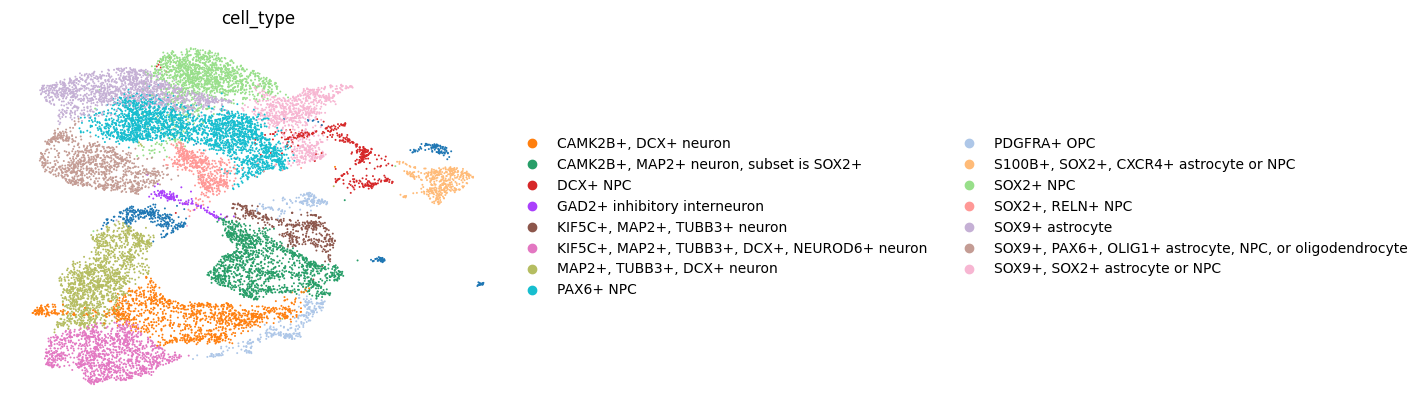

In [157]:
sc.pl.umap(adata_concat, color = ['cell_type'], frameon = False, legend_loc = "right margin")

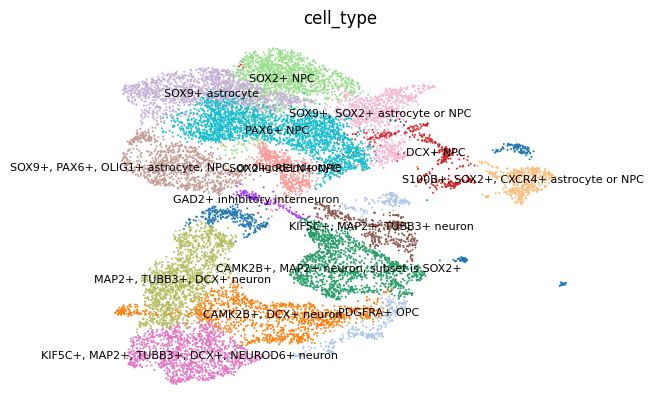

In [158]:
import matplotlib.pyplot as plt

sc.pl.umap(
    adata_concat, 
    color=['cell_type'], 
    frameon=False, 
    legend_loc="on data", 
    legend_fontsize=8,  # Adjust font size
    legend_fontweight='normal'  # Remove bold formatting
)
plt.show()


In [101]:
print(adata_concat.var_names[:10])  # Check how the gene names appear after concatenation
print(adata.var_names[:10])
print(fetal_adata.var_names[:10])


Index(['110', '138', '818', '820', '1050', '1235', '1265', '1269', '1331',
       '1334'],
      dtype='object')
Index(['30', '110', '127', '138', '288', '300', '521', '680', '693', '695'], dtype='object')
Index(['109', '110', '134', '138', '152', '167', '253', '282', '293', '294'], dtype='object')


In [112]:
adata = sc.read_h5ad("ipsc_adata_file.h5ad")

original_gene_names = adata.var  # Use one of the original datasets
original_gene_names
adata.var

# Restore gene names from the 'gene_id' column
adata_concat.var_names = adata.var["gene_id"]

# Ensure that var_names are unique
adata_concat.var_names_make_unique()
adata_concat.var_names


ValueError: Length of passed value for var_names is 36601, but this AnnData has shape: (14415, 129)

In [4]:
import numpy as np
import scanpy as sc

adata = sc.read('ipsc_adata_file.h5ad')
fetal_adata = sc.read('fetal_adata_file.h5ad')

# Check if var_names (gene IDs) are identical
genes_match = np.array_equal(adata.var_names, fetal_adata.var_names)

print("Do the gene IDs match?", genes_match)


Do the gene IDs match? False


In [5]:
genes_match_unordered = set(adata.var_names) == set(fetal_adata.var_names)
print("Do both datasets have the same genes (ignoring order)?", genes_match_unordered)


Do both datasets have the same genes (ignoring order)? False


In [7]:
adata_concat = sc.read('concatenated_samples.h5ad')
print(adata_concat.obs['sample'].unique())  # See which samples are present


['ipsc', 'fetal']
Categories (2, object): ['fetal', 'ipsc']


/home/cwebster/cwebster@alignment/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
# Store gene names from the original datasets
gene_map = {
    "ipsc": adata.var_names,  # Replace "sample1" with actual sample name in adata
    "fetal": fetal_adata.var_names  # Replace "sample2" with actual sample name in fetal_adata
}


In [10]:
# Create an empty list to store gene names
corrected_gene_ids = []

# Iterate through each sample and assign the corresponding gene names
for sample in adata_concat.obs['sample']:
    corrected_gene_ids.append(gene_map.get(sample, "Unknown"))

# Convert list to Pandas Series and assign to the concatenated object
adata_concat.var["gene_id"] = corrected_gene_ids


ValueError: Length of values (14415) does not match length of index (129)

In [11]:
print("adata_concatenated shape:", adata_concat.shape)  # (cells, genes)
print("Number of genes in adata_concatenated:", adata_concat.n_vars)

# Check the number of genes in the original datasets
for sample in gene_map:
    print(f"Sample {sample} has {len(gene_map[sample])} genes")


adata_concatenated shape: (14415, 129)
Number of genes in adata_concatenated: 129
Sample ipsc has 36601 genes
Sample fetal has 35780 genes
